# <b><span style='color:#F1A424'>AutoML - Binary Classification - Bank Churn Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used - Bank Churn Dataset**

**Features**:

- `customer_id`: customer_id .
- `credit_score`: credit score of customer.
- `country`: country of customer.
- `gender`: Gender of customer.
- `age`: Age of customer.
- `tenure`: tenure.
- `balance`: bank balance.
- `products_number`: products number.
- `credit_card`: having credit card or not.
- `active_member`: active member or not.
- `estimated_salary`: Estimated salary of customer..

**Target Variable**:

- `churn`: 1 if the client has left the bank during some period or 0 if he/she has not.

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the Customer Churn for ABC Bank.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'Age' feature :
    - Aim is to treat 'Age' as categorical variable rather than numerical and check how different age group people will impact prediction.
- Target encoding on 'gender' feature :
    - Aim is to get gender feature encoded with help of target column distribution rather than default encoding i.e., one-hot encoding.
- Deletion of id column 'customer_id' using antiselect.
- Feature scaling using 'std' method. 

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','bank_churn')

In [5]:
# Fetching in teradata dataframe
bank_df = DataFrame("bank_churn")

In [6]:
# first 5 rows
bank_df.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [7]:
# bank_df dataset
bank_df.shape

(10000, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
bank_df_sample = bank_df.sample(frac = [0.8, 0.2])

In [9]:
bank_df_sample.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,sampleid
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0,1
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0,1
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0,1
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0,1
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0,1
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0,1
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0,1
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0,1
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0,1


In [10]:
# Fetching train and test data
bank_df_train= bank_df_sample[bank_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
bank_df_test = bank_df_sample[bank_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
bank_df_train.shape

(8000, 12)

In [12]:
# test data shape
bank_df_test.shape

(2000, 12)

In [13]:
#train dataset
bank_df_train.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15565714,601,France,Male,47,1,64430.06,2,0,1,96517.97,0
15565796,745,Germany,Male,48,10,96048.55,1,1,0,74510.65,0
15565806,532,France,Male,38,9,0.0,2,0,0,30583.95,0
15565878,631,Spain,Male,29,3,0.0,2,1,1,197963.46,0
15565891,709,France,Male,39,8,0.0,2,1,0,56214.09,0
15565996,653,France,Male,44,8,0.0,2,1,1,154639.72,0
15565879,845,France,Female,28,9,0.0,2,1,1,56185.98,0
15565779,627,Germany,Female,30,6,57809.32,1,1,0,188258.49,0
15565706,612,Spain,Male,35,1,0.0,1,1,1,83256.26,1
15565701,698,Spain,Female,39,9,161993.89,1,0,0,90212.38,0


In [14]:
# test dataset
bank_df_test.head()

customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
15566295,761,France,Female,33,6,138053.79,2,1,0,148779.41,0
15566988,656,Germany,Female,46,7,141535.52,1,1,0,50595.15,1
15567063,766,Germany,Female,34,6,106434.94,1,0,1,137995.66,1
15567333,712,France,Female,31,7,0.0,2,1,0,170333.38,0
15567725,689,France,Female,46,7,52016.08,2,1,1,72993.65,0
15567897,619,Germany,Male,23,5,132725.1,1,1,1,143913.33,0
15567335,559,France,Female,42,7,0.0,2,1,1,190040.29,0
15566633,698,Germany,Male,55,8,155059.1,2,1,1,144584.29,0
15566251,618,France,Female,37,5,96652.86,1,1,0,98686.4,1
15566030,497,Germany,Male,41,5,80542.81,1,0,0,88729.22,1


In [15]:
AutoClassifier.generate_custom_config("custom_bank_churn")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  1

Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Feat

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoClassifier instance
# Excluding svm and glm from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 100 sec
# Using verbose level 2 for detailed loggging
# Passing custom json file to provide customized value for AutoML.

aml = AutoClassifier(exclude=['svm', 'glm'],
                     stopping_metric='MICRO-RECALL', 
                     stopping_tolerance=0.60,
                     max_runtime_secs=100,
                     verbose=2,
                     custom_config_file='custom_bank_churn.json')


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "age": {
            "Type": "Variable-Width",
            "NumOfBins": 4,
            "Bin_1": {
                "min_value": 0,
                "max_value": 24,
                "label": "young"
            },
            "Bin_2": {
                "min_value": 25,
                "max_value": 49,
                "label": "adult"
            },
            "Bin_3": {
                "min_value": 50,
                "max_value": 74,
                "label": "old"
            },
            "Bin_4": {
                "min_value": 75,
                "max_value": 100,
                "label": "older"
            }
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "gender": {
                "encoder_method": "CBM_BETA",
                "response_column": "chu

Feature Exploration started ...

Data Overview:
Total Rows in the data: 8000
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
tenure,BIGINT,8000,0,None,332,7668,0,0.0,100.0
active_member,BIGINT,8000,0,None,3896,4104,0,0.0,100.0
churn,BIGINT,8000,0,None,6361,1639,0,0.0,100.0
balance,FLOAT,8000,0,None,2863,5137,0,0.0,100.0
products_number,BIGINT,8000,0,None,0,8000,0,0.0,100.0
gender,VARCHAR(20) CHARACTER SET LATIN,8000,0,0,None,None,None,0.0,100.0
customer_id,BIGINT,8000,0,None,0,8000,0,0.0,100.0
estimated_salary,FLOAT,8000,0,None,0,8000,0,0.0,100.0
age,INTEGER,8000,0,None,0,8000,0,0.0,100.0
credit_card,BIGINT,8000,0,None,2326,5674,0,0.0,100.0



Statistics of Data:


func,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
min,15565701,350,18,0,0,1,0,0,90.07,0
std,72079.614,96.014,10.467,2.896,62302.947,0.58,0.454,0.5,57587.116,0.404
25%,15628305.5,584,32,2,0,1,0,0,51226.828,0
50%,15690738,651,37,5,98058.815,1,1,1,100314.07,0
75%,15753347.75,717,44,7,127894.435,2,1,1,149656.77,0
max,15815690,850,92,10,250898.09,4,1,1,199992.48,1
mean,15690816.713,649.803,38.953,5.001,77022.701,1.526,0.709,0.513,100428.097,0.205
count,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
country                   3         
gender                    2         

No Futile columns found.

Target Column Distribution:


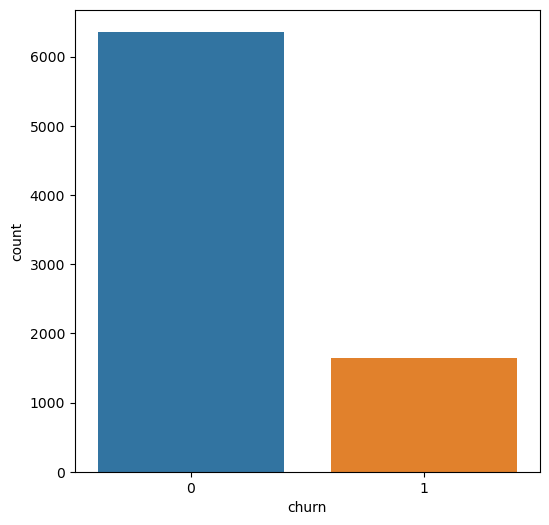

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0              age             3.5000
1  products_number             0.6000
2     credit_score             0.1750
3            churn            20.4875


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


No information provided for Equal-Width Transformation.                                  


,ColumnName,MinValue,MaxValue,Label
0,age,0,24,young
1,age,25,49,adult
2,age,50,74,old
3,age,75,100,older


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263230881994"' - 4/21


balance,active_member,credit_score,id,country,estimated_salary,tenure,customer_id,gender,churn,credit_card,products_number,age
157960.49,0,765,4382,France,136602.8,9,15669262,Male,0,0,2,adult
142645.43,0,748,3933,France,69132.66,1,15646609,Male,0,0,1,adult
141078.57,1,706,1554,Spain,24402.87,2,15797502,Male,0,1,1,young
60263.23,0,664,2875,Germany,170835.32,7,15766765,Male,0,1,1,adult
146033.62,0,831,1200,France,191260.74,2,15646276,Female,0,1,1,adult
115796.7,0,794,1651,Germany,160526.36,6,15651883,Female,1,1,1,old  
67563.31,0,582,5637,Spain,44506.09,8,15690647,Female,1,1,1,adult
183579.54,1,673,4920,Germany,34047.54,1,15581736,Male,0,0,2,adult
86449.39,1,850,113,France,188809.23,6,15577398,Male,0,1,1,adult
121455.65,0,654,833,France,190068.53,9,15603170,Male,1,1,1,adult


Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 23% - 5/21


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261859364415"' - 6/21


gender,balance,active_member,credit_score,country,estimated_salary,tenure,customer_id,churn,products_number,age,credit_card,id
0.24991815723793678,163146.46,0,351,Germany,169621.69,4,15679249,1,1,old  ,1,1529
0.24991815723793678,146781.24,0,743,Germany,189307.7,1,15603247,0,1,adult,1,5895
0.24991815723793678,137687.72,0,631,France,190067.12,8,15796496,0,1,adult,1,6678
0.24991815723793678,149363.12,1,756,Germany,109098.39,5,15790599,0,2,adult,1,7627
0.24991815723793678,102523.88,1,607,France,166792.71,1,15729117,0,1,adult,1,3663
0.24991815723793678,143054.56,1,628,France,109608.81,4,15720636,1,1,old  ,0,7271
0.167926495677889,149995.72,0,583,Germany,42143.55,8,15628274,0,2,adult,1,4737
0.167926495677889,107209.73,1,664,France,112340.2,10,15748856,0,1,adult,1,7596
0.167926495677889,160680.41,0,763,Germany,30886.35,9,15809347,0,1,adult,1,2123
0.167926495677889,130854.59,1,833,Germany,30722.52,1,15798424,1,1,old  ,1,4847


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261116230905"' - 6/21


['country', 'age']


gender,balance,active_member,credit_score,country_0,country_1,country_2,estimated_salary,tenure,customer_id,churn,products_number,age_0,age_1,age_2,age_3,credit_card,id
0.167926495677889,95830.43,0,595,1,0,0,177738.98,4,15688984,0,1,0,0,0,1,1,7568
0.167926495677889,113000.92,1,558,1,0,0,152872.39,8,15797686,0,1,1,0,0,0,1,5513
0.167926495677889,104217.3,0,504,0,1,0,55857.48,9,15574068,1,1,0,1,0,0,0,5607
0.167926495677889,121907.97,1,596,0,0,1,30314.04,7,15626383,0,1,0,1,0,0,0,3168
0.167926495677889,111835.94,0,602,1,0,0,124389.61,7,15680001,0,2,1,0,0,0,1,6259
0.167926495677889,141136.79,1,600,1,0,0,67803.83,1,15576360,0,1,1,0,0,0,1,4035
0.24991815723793678,163146.46,0,351,0,1,0,169621.69,4,15679249,1,1,0,1,0,0,1,1529
0.24991815723793678,146781.24,0,743,0,1,0,189307.7,1,15603247,0,1,1,0,0,0,1,5895
0.24991815723793678,137687.72,0,631,1,0,0,190067.12,8,15796496,0,1,1,0,0,0,1,6678
0.24991815723793678,149363.12,1,756,0,1,0,109098.39,5,15790599,0,2,1,0,0,0,1,7627


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


gender,balance,active_member,credit_score,country_0,country_1,country_2,estimated_salary,tenure,churn,products_number,age_0,age_1,age_2,age_3,credit_card,id
0.167926495677889,95830.43,0,595,1,0,0,177738.98,4,0,1,0,0,0,1,1,7568
0.167926495677889,113000.92,1,558,1,0,0,152872.39,8,0,1,1,0,0,0,1,5513
0.167926495677889,104217.3,0,504,0,1,0,55857.48,9,1,1,0,1,0,0,0,5607
0.167926495677889,121907.97,1,596,0,0,1,30314.04,7,0,1,0,1,0,0,0,3168
0.167926495677889,111835.94,0,602,1,0,0,124389.61,7,0,2,1,0,0,0,1,6259
0.167926495677889,141136.79,1,600,1,0,0,67803.83,1,0,1,1,0,0,0,1,4035
0.24991815723793678,163146.46,0,351,0,1,0,169621.69,4,1,1,0,1,0,0,1,1529
0.24991815723793678,146781.24,0,743,0,1,0,189307.7,1,0,1,1,0,0,0,1,5895
0.24991815723793678,137687.72,0,631,1,0,0,190067.12,8,0,1,1,0,0,0,1,6678
0.24991815723793678,149363.12,1,756,0,1,0,109098.39,5,0,2,1,0,0,0,1,7627


No information provided for performing customized train test split. Proceeding with default option.
No information provided for performing customized imbalanced dataset sampling. AutoML will Proceed with default option.


Training size : 0.8                                                                       
Testing size  : 0.2                                                                       


gender,balance,active_member,credit_score,country_0,country_1,country_2,estimated_salary,tenure,churn,products_number,age_0,age_1,age_2,age_3,credit_card,id
0.167926495677889,131078.42,0,710,0,0,1,119348.76,3,1,2,0,1,0,0,1,17
0.167926495677889,100082.14,1,658,1,0,0,49809.88,5,0,1,1,0,0,0,0,20
0.167926495677889,0.0,0,665,0,0,1,132152.32,8,0,2,1,0,0,0,1,22
0.167926495677889,167557.12,1,667,0,0,1,41183.02,7,0,1,1,0,0,0,1,25
0.167926495677889,167268.98,1,672,1,0,0,169469.3,4,0,1,1,0,0,0,1,30
0.167926495677889,136186.44,1,754,0,1,0,121529.59,1,1,1,0,1,0,0,1,39
0.24991815723793678,108862.76,0,655,0,1,0,79555.08,4,1,1,1,0,0,0,1,10
0.24991815723793678,0.0,0,569,0,0,1,133997.53,3,0,1,1,0,0,0,1,11
0.24991815723793678,118114.28,1,760,0,0,1,156660.21,1,0,2,1,0,0,0,0,13
0.24991815723793678,109705.52,0,728,1,0,0,20276.87,2,1,1,1,0,0,0,1,15


gender,balance,active_member,credit_score,country_0,country_1,country_2,estimated_salary,tenure,churn,products_number,age_0,age_1,age_2,age_3,credit_card,id
0.167926495677889,134944.0,1,648,1,0,0,117036.38,7,0,1,1,0,0,0,1,63
0.167926495677889,0.0,0,813,1,0,0,33953.87,6,0,1,1,0,0,0,1,67
0.167926495677889,137204.77,1,850,0,0,1,28865.59,4,0,1,1,0,0,0,1,77
0.167926495677889,83264.28,0,685,0,0,1,9663.28,6,0,1,1,0,0,0,0,102
0.167926495677889,109346.13,0,683,1,0,0,102665.92,7,0,2,1,0,0,0,1,124
0.167926495677889,197200.04,0,640,0,0,1,141453.62,5,0,2,1,0,0,0,1,137
0.24991815723793678,196853.62,1,515,1,0,0,132770.11,0,0,1,1,0,0,0,1,12
0.24991815723793678,100781.75,1,586,0,1,0,54448.41,9,0,2,0,1,0,0,1,32
0.24991815723793678,143500.82,0,637,0,1,0,166996.46,2,1,1,1,0,0,0,1,41
0.24991815723793678,0.0,1,546,1,0,0,66408.01,8,1,1,1,0,0,0,1,47


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
        ColumnName  OutlierPercentage
0            churn            20.4875
1     credit_score             0.1750
2  products_number             0.6000


['credit_score', 'products_number']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261038873759"' - 11/21


gender,balance,active_member,credit_score,country_0,country_1,country_2,estimated_salary,tenure,churn,products_number,age_0,age_1,age_2,age_3,credit_card,id
0.167926495677889,0.0,0,665,0,0,1,132152.32,8,0,2,1,0,0,0,1,22
0.167926495677889,167268.98,1,672,1,0,0,169469.3,4,0,1,1,0,0,0,1,30
0.167926495677889,136186.44,1,754,0,1,0,121529.59,1,1,1,0,1,0,0,1,39
0.167926495677889,46520.69,1,714,1,0,0,96687.25,9,0,1,1,0,0,0,1,43
0.167926495677889,160980.03,0,844,1,0,0,145936.28,2,0,1,0,0,0,1,0,45
0.167926495677889,110929.96,1,848,0,0,1,30876.84,3,0,1,1,0,0,0,1,50
0.24991815723793678,118114.28,1,760,0,0,1,156660.21,1,0,2,1,0,0,0,0,13
0.24991815723793678,110031.09,1,639,0,1,0,133995.59,10,0,2,1,0,0,0,1,16
0.24991815723793678,126776.3,1,850,0,0,1,132298.49,8,0,2,0,1,0,0,1,18
0.24991815723793678,0.0,1,507,0,0,1,60688.38,4,0,2,1,0,0,0,1,21


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264155449134"' - 12/21
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260751783434"'


['country_1', 'age_1', 'active_member', 'balance', 'credit_score', 'age_0', 'estimated_salary', 'credit_card', 'tenure', 'gender', 'country_0', 'age_2', 'country_2', 'age_3', 'products_number']


['active_member', 'balance', 'credit_score', 'estimated_salary', 'credit_card', 'tenure', 'gender', 'products_number']


country_1,age_1,age_0,age_2,country_0,country_2,churn,age_3,id,active_member,balance,credit_score,estimated_salary,credit_card,tenure,gender,products_number
0,0,1,0,1,0,0,0,2,1.312017673025743,-1.3541811238453434,0.4236428580701609,1.3240132676921328,0.770907417018501,0.8190845369782715,1.1005321391796774,1.159754845924068
1,0,1,0,0,0,0,0,4,1.312017673025743,0.17052548815702742,0.6230556814702085,0.1473604247652575,0.770907417018501,-0.6501862450740455,1.1005321391796774,-0.7340338307669576
0,0,1,0,1,0,1,0,5,1.312017673025743,0.7236685400370045,0.656291152036883,0.5486329631213884,-1.2971726278982896,-1.7521393316132834,1.1005321391796774,1.159754845924068
1,0,1,0,0,0,1,0,6,-0.7621848550972784,0.3866911457585806,1.819532621870494,1.5028216211977798,-1.2971726278982896,0.08444914595211303,1.1005321391796774,-0.7340338307669576
0,0,1,0,1,0,0,0,8,-0.7621848550972784,0.9906907382922354,0.822468504870256,-1.0871451512832662,-1.2971726278982896,0.8190845369782715,1.1005321391796774,1.159754845924068
0,0,1,0,1,0,0,0,9,-0.7621848550972784,-1.3541811238453434,0.9664888773258459,-0.526223919573158,0.770907417018501,0.4517668414651923,1.1005321391796774,-0.7340338307669576
0,1,0,0,0,1,0,0,7,-0.7621848550972784,0.3289413290884178,-1.4707789642302909,1.3907915046522965,0.770907417018501,1.55371992800443,1.1005321391796774,-0.7340338307669576
0,0,1,0,1,0,0,0,3,-0.7621848550972784,-1.3541811238453434,-0.06381071024106648,0.1004669004958342,-1.2971726278982896,0.4517668414651923,1.1005321391796774,1.159754845924068
0,0,1,0,1,0,0,0,1,-0.7621848550972784,0.4928782251700725,0.33501493655902864,1.3194957654977715,0.770907417018501,1.55371992800443,1.1005321391796774,1.159754845924068
0,0,1,0,0,1,1,0,0,1.312017673025743,-1.3541811238453434,0.12452362297008955,1.5207728028797316,0.770907417018501,0.08444914595211303,1.1005321391796774,3.0535435226150938


country_1,age_1,age_0,age_2,country_0,country_2,churn,age_3,id,active_member,balance,credit_score,estimated_salary,credit_card,tenure,gender,products_number
0,0,1,0,0,1,1,0,119,-0.7621848550972784,-0.08164882073018566,0.1688375837256557,-0.75348246684195,-1.2971726278982896,0.8190845369782715,-1.0417198583725331,3.0535435226150938
0,1,0,0,1,0,0,0,171,1.312017673025743,-1.3541811238453434,0.9332534067591713,-0.4437363260756672,0.770907417018501,-0.6501862450740455,-1.0417198583725331,1.159754845924068
0,0,1,0,1,0,1,0,342,-0.7621848550972784,-0.039558571918885226,0.9775673675147375,-1.0543250384225191,0.770907417018501,-1.7521393316132834,-1.0417198583725331,-0.7340338307669576
1,0,1,0,0,0,0,0,1021,1.312017673025743,0.05130460849396245,-0.617735219685643,0.416499650926154,0.770907417018501,0.08444914595211303,1.1005321391796774,-0.7340338307669576
1,0,1,0,0,0,0,0,660,1.312017673025743,1.0004701099415874,2.218358268670589,-1.4451052133321198,0.770907417018501,0.8190845369782715,-1.0417198583725331,1.159754845924068
1,0,1,0,0,0,1,0,274,1.312017673025743,0.43582174114810546,0.5011922893924016,-1.4078886706519251,0.770907417018501,0.4517668414651923,-1.0417198583725331,1.159754845924068
0,0,1,0,0,1,0,0,416,1.312017673025743,0.388843858277778,0.29070097580346255,-1.3466548921503712,-1.2971726278982896,1.55371992800443,-1.0417198583725331,-0.7340338307669576
0,0,1,0,0,1,0,0,102,-0.7621848550972784,0.012529192265596513,0.4014858776923778,-1.5769003519038427,-1.2971726278982896,0.4517668414651923,-1.0417198583725331,-0.7340338307669576
0,0,1,0,0,1,0,0,407,1.312017673025743,0.29154634078887004,-1.6147993366858808,0.9837194095526091,0.770907417018501,1.55371992800443,-1.0417198583725331,1.159754845924068
1,0,1,0,0,0,0,0,2977,-0.7621848550972784,0.9551398769582368,0.6008987010924254,1.1545162606577504,0.770907417018501,0.08444914595211303,-1.0417198583725331,1.159754845924068


['tenure', 'country_2', 'age_3', 'credit_card', 'products_number', 'country_1', 'active_member', 'credit_score', 'age_0', 'country_0', 'gender', 'balance', 'estimated_salary']


['r_tenure', 'r_credit_card', 'r_products_number', 'r_active_member', 'r_credit_score', 'r_gender', 'r_balance', 'r_estimated_salary']


r_country_2,r_age_0,r_country_0,r_country_1,r_age_3,churn,id,r_tenure,r_credit_card,r_products_number,r_active_member,r_credit_score,r_gender,r_balance,r_estimated_salary
0,1,1,0,0,0,2,0.8190845369782715,0.770907417018501,1.159754845924068,1.312017673025743,0.4236428580701609,1.1005321391796774,-1.3541811238453434,1.3240132676921328
0,1,0,1,0,0,4,-0.6501862450740455,0.770907417018501,-0.7340338307669576,1.312017673025743,0.6230556814702085,1.1005321391796774,0.17052548815702742,0.1473604247652575
0,1,1,0,0,1,5,-1.7521393316132834,-1.2971726278982896,1.159754845924068,1.312017673025743,0.656291152036883,1.1005321391796774,0.7236685400370045,0.5486329631213884
0,1,0,1,0,1,6,0.08444914595211303,-1.2971726278982896,-0.7340338307669576,-0.7621848550972784,1.819532621870494,1.1005321391796774,0.3866911457585806,1.5028216211977798
0,1,1,0,0,0,8,0.8190845369782715,-1.2971726278982896,1.159754845924068,-0.7621848550972784,0.822468504870256,1.1005321391796774,0.9906907382922354,-1.0871451512832662
0,1,1,0,0,0,9,0.4517668414651923,0.770907417018501,-0.7340338307669576,-0.7621848550972784,0.9664888773258459,1.1005321391796774,-1.3541811238453434,-0.526223919573158
1,0,0,0,0,0,7,1.55371992800443,0.770907417018501,-0.7340338307669576,-0.7621848550972784,-1.4707789642302909,1.1005321391796774,0.3289413290884178,1.3907915046522965
0,1,1,0,0,0,3,0.4517668414651923,-1.2971726278982896,1.159754845924068,-0.7621848550972784,-0.06381071024106648,1.1005321391796774,-1.3541811238453434,0.1004669004958342
0,1,1,0,0,0,1,1.55371992800443,0.770907417018501,1.159754845924068,-0.7621848550972784,0.33501493655902864,1.1005321391796774,0.4928782251700725,1.3194957654977715
1,1,0,0,0,1,0,0.08444914595211303,0.770907417018501,3.0535435226150938,1.312017673025743,0.12452362297008955,1.1005321391796774,-1.3541811238453434,1.5207728028797316


r_country_2,r_age_0,r_country_0,r_country_1,r_age_3,churn,id,r_tenure,r_credit_card,r_products_number,r_active_member,r_credit_score,r_gender,r_balance,r_estimated_salary
1,1,0,0,0,1,119,0.8190845369782715,-1.2971726278982896,3.0535435226150938,-0.7621848550972784,0.1688375837256557,-1.0417198583725331,-0.08164882073018566,-0.75348246684195
0,0,1,0,0,0,171,-0.6501862450740455,0.770907417018501,1.159754845924068,1.312017673025743,0.9332534067591713,-1.0417198583725331,-1.3541811238453434,-0.4437363260756672
0,1,1,0,0,1,342,-1.7521393316132834,0.770907417018501,-0.7340338307669576,-0.7621848550972784,0.9775673675147375,-1.0417198583725331,-0.039558571918885226,-1.0543250384225191
0,1,0,1,0,0,1021,0.08444914595211303,0.770907417018501,-0.7340338307669576,1.312017673025743,-0.617735219685643,1.1005321391796774,0.05130460849396245,0.416499650926154
0,1,0,1,0,0,660,0.8190845369782715,0.770907417018501,1.159754845924068,1.312017673025743,2.218358268670589,-1.0417198583725331,1.0004701099415874,-1.4451052133321198
0,1,0,1,0,1,274,0.4517668414651923,0.770907417018501,1.159754845924068,1.312017673025743,0.5011922893924016,-1.0417198583725331,0.43582174114810546,-1.4078886706519251
1,1,0,0,0,0,416,1.55371992800443,-1.2971726278982896,-0.7340338307669576,1.312017673025743,0.29070097580346255,-1.0417198583725331,0.388843858277778,-1.3466548921503712
1,1,0,0,0,0,102,0.4517668414651923,-1.2971726278982896,-0.7340338307669576,-0.7621848550972784,0.4014858776923778,-1.0417198583725331,0.012529192265596513,-1.5769003519038427
1,1,0,0,0,0,407,1.55371992800443,0.770907417018501,1.159754845924068,1.312017673025743,-1.6147993366858808,-1.0417198583725331,0.29154634078887004,0.9837194095526091
0,1,0,1,0,0,2977,0.08444914595211303,0.770907417018501,1.159754845924068,-0.7621848550972784,0.6008987010924254,-1.0417198583725331,0.9551398769582368,1.1545162606577504


['gender', 'balance', 'active_member', 'credit_score', 'estimated_salary', 'tenure', 'products_number', 'credit_card']


country_1,age_1,age_0,country_0,churn,country_2,age_2,age_3,id,gender,balance,active_member,credit_score,estimated_salary,tenure,products_number,credit_card
0,0,1,0,0,1,0,0,22,-0.9035853873959298,-1.2438645382593738,-1.0193884244725722,0.1522075861244406,0.5466885696031775,1.0392902226642986,0.8855633205338819,0.6377192591121537
0,0,1,1,0,0,0,0,30,-0.9035853873959298,1.44140893239491,0.9809803368303072,0.2253742187359253,1.1948600253535229,-0.338551324424315,-0.937790321291227,0.6377192591121537
1,1,0,0,1,0,0,0,39,-0.9035853873959298,0.9424214927479974,0.9809803368303072,1.082469057899032,0.3621787199812928,-1.3719324847407752,-0.937790321291227,0.6377192591121537
0,0,1,1,0,0,0,0,43,-0.9035853873959298,-0.4970388285938277,0.9809803368303072,0.6643740144048336,-0.06931642464308574,1.383750609436452,-0.937790321291227,0.6377192591121537
0,0,0,1,0,0,0,1,45,-0.9035853873959298,1.3404484877669145,-1.0193884244725722,2.0231829057609785,0.78610690997275,-1.0274720979686218,-0.937790321291227,-1.5680881292376692
0,0,1,0,0,1,0,0,50,-0.9035853873959298,0.5369634352760712,0.9809803368303072,2.0649924101103982,-1.2124000625266207,-0.6830117111964684,-0.937790321291227,0.6377192591121537
0,0,1,0,0,1,0,0,13,1.106702270697358,0.6522978140753617,0.9809803368303072,1.1451833144231618,0.972374537188693,-1.3719324847407752,0.8855633205338819,-1.5680881292376692
1,0,1,0,0,0,0,0,16,1.106702270697358,0.5225333134174514,0.9809803368303072,-0.11955419214678836,0.5787049599767,1.7282109962086054,0.8855633205338819,0.6377192591121537
0,1,0,0,0,1,0,0,18,1.106702270697358,0.7913546344629604,0.9809803368303072,2.085897162285108,0.5492274465885878,1.0392902226642986,0.8855633205338819,0.6377192591121537
0,0,1,0,0,1,0,0,21,1.106702270697358,-1.2438645382593738,0.9809803368303072,-1.499267835677643,-0.6945931746176939,-0.338551324424315,0.8855633205338819,0.6377192591121537


country_1,age_1,age_0,country_0,churn,country_2,age_2,age_3,id,gender,balance,active_member,credit_score,estimated_salary,tenure,products_number,credit_card
0,0,1,1,0,0,0,0,63,-0.9035853873959298,0.9224758269653776,0.9809803368303072,-0.02548280736059372,0.2841346106591557,0.6948298358921452,-0.937790321291227,0.6377192591121537
0,0,1,1,0,0,0,0,67,-0.9035853873959298,-1.2438645382593738,-1.0193884244725722,1.6991592470529746,-1.1589540705281394,0.3503694491199918,-0.937790321291227,0.6377192591121537
0,0,1,0,0,1,0,0,77,-0.9035853873959298,0.958769380643119,0.9809803368303072,2.085897162285108,-1.247334155274155,-0.338551324424315,-0.937790321291227,0.6377192591121537
0,0,1,0,0,1,0,0,102,-0.9035853873959298,0.09282898457510544,-1.0193884244725722,0.3612551078715398,-1.5808656797026972,0.3503694491199918,-0.937790321291227,-1.5680881292376692
0,0,1,1,0,0,0,0,124,-0.9035853873959298,0.5115372224718419,-1.0193884244725722,0.34035035569682986,0.034529150142197484,0.6948298358921452,0.8855633205338819,0.6377192591121537
0,0,1,0,0,1,0,0,137,-0.9035853873959298,1.9219109439846356,-1.0193884244725722,-0.1091018160594334,0.7082460472278589,0.00590906234783839,0.8855633205338819,0.6377192591121537
0,0,1,1,0,0,0,0,12,1.106702270697358,1.9163496472295283,0.9809803368303072,-1.4156488269788035,0.5574191765185279,-1.7163928715129286,-0.937790321291227,0.6377192591121537
1,1,0,0,0,0,0,0,32,1.106702270697358,0.37404787802434086,0.9809803368303072,-0.6735301247766012,-0.8029773589417866,1.383750609436452,0.8855633205338819,0.6377192591121537
1,0,1,0,1,0,0,0,41,1.106702270697358,1.0598438060082582,-1.0193884244725722,-0.14045894432149827,1.151908417194511,-1.0274720979686218,-0.937790321291227,0.6377192591121537
0,0,1,1,1,0,0,0,47,1.106702270697358,-1.2438645382593738,0.9809803368303072,-1.0916251682707996,-0.5952469546541987,1.0392902226642986,-0.937790321291227,0.6377192591121537


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


                                                                                          
Skipping customized hyperparameter tuning


response_column : churn                                                                                                                               
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.2, 0.3)
max_depth : (5, 4, 6, 7)
min_node_size : (1, 3, 4)
num_trees : (-1, 30, 40)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : knn
model_type : Classification
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : churn
name : xgboost
model_type : Classification
colu

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262319474192"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264504000317"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261270005250"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262331664487"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262832544756"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262437086050"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261550719827"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262539381291"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269810044883"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_2,pca,0.840000,0.840000,0.840000,0.840000,0.805850,0.645958,0.677354,0.830125,0.840000,0.812511
1,2,DECISIONFOREST_2,pca,0.838750,0.838750,0.838750,0.838750,0.812877,0.637253,0.667659,0.830942,0.838750,0.808347
2,3,DECISIONFOREST_0,lasso,0.835000,0.835000,0.835000,0.835000,0.750907,0.701641,0.720528,0.822813,0.835000,0.826057
3,4,DECISIONFOREST_1,rfe,0.831875,0.831875,0.831875,0.831875,0.743630,0.705332,0.720867,0.821194,0.831875,0.824724
4,5,XGBOOST_3,lasso,0.825000,0.825000,0.825000,0.825000,0.730832,0.717978,0.723964,0.820443,0.825000,0.822495
5,6,XGBOOST_0,lasso,0.825000,0.825000,0.825000,0.825000,0.730832,0.717978,0.723964,0.820443,0.825000,0.822495
6,7,DECISIONFOREST_3,lasso,0.810000,0.810000,0.810000,0.810000,0.703056,0.661029,0.676427,0.793843,0.810000,0.799085
7,8,KNN_8,pca,0.788125,0.788125,0.788125,0.788125,0.658827,0.621251,0.633632,0.766461,0.788125,0.773999
8,9,KNN_9,lasso,0.786250,0.786250,0.786250,0.786250,0.676000,0.684557,0.679984,0.791640,0.786250,0.788786
9,10,KNN_4,rfe,0.777500,0.777500,0.777500,0.777500,0.663607,0.672266,0.667600,0.783601,0.777500,0.780367


In [16]:
# Fitting train data
aml.fit(bank_df_train, bank_df_train.churn)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_2,pca,0.840000,0.840000,0.840000,0.840000,0.805850,0.645958,0.677354,0.830125,0.840000,0.812511
1,2,DECISIONFOREST_2,pca,0.838750,0.838750,0.838750,0.838750,0.812877,0.637253,0.667659,0.830942,0.838750,0.808347
2,3,DECISIONFOREST_0,lasso,0.835000,0.835000,0.835000,0.835000,0.750907,0.701641,0.720528,0.822813,0.835000,0.826057
3,4,DECISIONFOREST_1,rfe,0.831875,0.831875,0.831875,0.831875,0.743630,0.705332,0.720867,0.821194,0.831875,0.824724
4,5,XGBOOST_3,lasso,0.825000,0.825000,0.825000,0.825000,0.730832,0.717978,0.723964,0.820443,0.825000,0.822495
5,6,XGBOOST_0,lasso,0.825000,0.825000,0.825000,0.825000,0.730832,0.717978,0.723964,0.820443,0.825000,0.822495
6,7,DECISIONFOREST_3,lasso,0.810000,0.810000,0.810000,0.810000,0.703056,0.661029,0.676427,0.793843,0.810000,0.799085
7,8,KNN_8,pca,0.788125,0.788125,0.788125,0.788125,0.658827,0.621251,0.633632,0.766461,0.788125,0.773999
8,9,KNN_9,lasso,0.786250,0.786250,0.786250,0.786250,0.676000,0.684557,0.679984,0.791640,0.786250,0.788786
9,10,KNN_4,rfe,0.777500,0.777500,0.777500,0.777500,0.663607,0.672266,0.667600,0.783601,0.777500,0.780367


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_2,pca,0.84,0.84,0.84,0.84,0.80585,0.645958,0.677354,0.830125,0.84,0.812511


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(bank_df_test)

Data Transformation started ...


balance,active_member,credit_score,id,country,estimated_salary,tenure,customer_id,gender,age,credit_card,products_number,churn
132446.08,0,842,14,France,87071.18,4,15717328,Female,37,1,2,1
0.0,0,754,9,France,73881.68,6,15737047,Female,45,1,1,1
126679.69,1,670,17,France,39451.09,8,15574584,Male,33,1,1,0
43658.33,1,850,15,France,3025.49,7,15642816,Female,27,1,2,0
154475.54,1,721,10,Germany,101300.94,9,15609618,Male,28,0,2,1
112281.6,0,834,18,Germany,140225.14,8,15806808,Female,57,1,3,1
0.0,1,604,8,Spain,166224.39,10,15602909,Female,41,1,2,0
0.0,1,729,16,Spain,149535.97,1,15680643,Female,42,1,2,0
0.0,1,731,13,France,24998.75,10,15688963,Female,52,1,1,1
0.0,1,695,21,France,141756.32,1,15675749,Female,23,1,2,0


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264036120594"'⫾⫾⫾｜ 33% - 5/15


balance,active_member,credit_score,country,estimated_salary,tenure,customer_id,gender,products_number,churn,credit_card,id,age
0.0,0,607,France,187048.72,3,15662434,Male,2,0,0,1942,adult
0.0,0,621,Spain,36122.96,8,15615896,Male,2,0,1,147,adult
0.0,1,723,France,134509.47,3,15801488,Male,2,0,1,959,adult
0.0,0,846,France,3440.47,5,15714466,Female,3,1,1,360,adult
0.0,1,587,France,170409.45,10,15777958,Male,2,0,1,688,adult
0.0,0,538,France,126962.41,5,15775562,Female,2,0,1,353,adult
0.0,0,850,France,178667.7,8,15719931,Male,2,0,1,1346,adult
0.0,1,433,France,87711.61,10,15643908,Female,1,0,1,448,adult
0.0,1,740,France,96528.0,9,15804038,Male,1,1,0,1876,adult
0.0,1,693,France,3494.02,1,15741094,Male,2,0,1,564,young


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261821956780"'⫾⫾⫾｜ 46% - 7/15


gender,balance,active_member,credit_score,id,estimated_salary,country,tenure,customer_id,churn,age,credit_card,products_number
0.167926495677889,132876.55,1,629,1431,130862.11,Spain,6,15803886,0,adult,1,1
0.167926495677889,99580.13,0,677,1948,21007.96,France,5,15694450,0,adult,1,1
0.167926495677889,51690.89,0,599,570,111622.76,Spain,4,15611318,1,adult,1,1
0.167926495677889,103133.26,1,756,1231,90059.04,France,1,15756071,0,adult,1,1
0.167926495677889,82293.82,1,551,1242,91565.25,Germany,9,15756475,0,adult,1,2
0.167926495677889,144900.58,0,477,1830,61315.37,France,9,15717984,1,adult,1,1
0.24991815723793678,94684.27,1,600,979,50488.91,Spain,6,15798348,0,old  ,1,1
0.24991815723793678,141789.15,0,639,1713,92455.96,Spain,1,15613216,0,adult,1,1
0.24991815723793678,107735.93,1,428,1107,58381.77,France,1,15713596,0,old  ,0,1
0.24991815723793678,106290.64,0,850,1626,121982.73,France,5,15675675,0,adult,1,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263139811325"'⫾⫾⫾｜ 46% - 7/15


gender,balance,active_member,credit_score,id,estimated_salary,country_0,country_1,country_2,tenure,customer_id,churn,age_0,age_1,age_2,age_3,credit_card,products_number
0.167926495677889,51690.89,0,599,570,111622.76,0,0,1,4,15611318,1,1,0,0,0,1,1
0.167926495677889,82293.82,1,551,1242,91565.25,0,1,0,9,15756475,0,1,0,0,0,1,2
0.167926495677889,144900.58,0,477,1830,61315.37,1,0,0,9,15717984,1,1,0,0,0,1,1
0.167926495677889,123760.68,1,847,198,53157.16,1,0,0,7,15619932,0,0,1,0,0,0,1
0.167926495677889,94416.78,1,627,459,145299.5,1,0,0,1,15597109,0,0,1,0,0,0,1
0.167926495677889,118311.76,0,614,1511,146134.68,1,0,0,1,15797787,0,1,0,0,0,1,1
0.167926495677889,107525.07,0,796,1522,18510.41,0,0,1,8,15596414,0,1,0,0,0,1,1
0.167926495677889,103133.26,1,756,1231,90059.04,1,0,0,1,15756071,0,1,0,0,0,1,1
0.167926495677889,99580.13,0,677,1948,21007.96,1,0,0,5,15694450,0,1,0,0,0,1,1
0.167926495677889,132876.55,1,629,1431,130862.11,0,0,1,6,15803886,0,1,0,0,0,1,1


gender,balance,active_member,credit_score,id,estimated_salary,country_0,country_1,country_2,tenure,churn,age_0,age_1,age_2,age_3,credit_card,products_number
0.167926495677889,51690.89,0,599,570,111622.76,0,0,1,4,1,1,0,0,0,1,1
0.167926495677889,82293.82,1,551,1242,91565.25,0,1,0,9,0,1,0,0,0,1,2
0.167926495677889,144900.58,0,477,1830,61315.37,1,0,0,9,1,1,0,0,0,1,1
0.167926495677889,123760.68,1,847,198,53157.16,1,0,0,7,0,0,1,0,0,0,1
0.167926495677889,94416.78,1,627,459,145299.5,1,0,0,1,0,0,1,0,0,0,1
0.167926495677889,118311.76,0,614,1511,146134.68,1,0,0,1,0,1,0,0,0,1,1
0.24991815723793678,107735.93,1,428,1107,58381.77,1,0,0,1,0,0,1,0,0,0,1
0.24991815723793678,117304.29,0,502,1320,196278.32,0,1,0,7,0,1,0,0,0,0,1
0.24991815723793678,121093.29,0,589,1721,3529.72,0,1,0,2,0,0,0,0,1,1,2
0.24991815723793678,88594.14,0,611,377,196332.45,1,0,0,9,0,1,0,0,0,1,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719262682722907"'⫾⫾⫾｜ 73% - 11/15


id,country_1,age_1,active_member,balance,credit_score,age_0,estimated_salary,credit_card,tenure,gender,country_0,age_2,country_2,age_3,products_number,churn
836,0,0,0,179581.31,794,1,23596.24,1,9,0.1679,0,0,1,0,1,0
986,1,0,0,107850.82,587,1,139431.0,1,9,0.1679,0,0,0,0,1,1
1026,0,0,0,131765.72,591,1,118782.06,1,9,0.1679,1,0,0,0,1,0
696,0,1,0,76817.0,644,0,196371.13,1,9,0.1679,1,0,0,0,4,1
1609,1,1,0,115920.62,720,0,157552.08,0,9,0.1679,0,0,0,0,2,1
1825,1,0,1,176702.36,708,1,104804.74,1,9,0.1679,0,0,0,0,2,0
229,1,1,1,122471.09,684,0,15807.07,0,9,0.1679,0,0,0,0,1,0
780,1,0,0,103604.31,619,1,140947.05,0,9,0.1679,0,0,0,0,2,0
949,1,1,0,116309.01,736,0,185360.4,1,9,0.1679,0,0,0,0,1,1
53,1,1,1,78778.49,613,0,8751.59,0,9,0.1679,0,0,0,0,1,0


country_1,age_1,age_0,age_2,country_0,country_2,churn,age_3,id,active_member,balance,credit_score,estimated_salary,credit_card,tenure,gender,products_number
0,0,1,0,1,0,0,0,1146,1.312017673025743,0.5167043127367219,0.844625485248039,0.27184493354332223,0.770907417018501,0.8190845369782715,-1.0417198583725331,-0.7340338307669576
1,1,0,0,0,0,0,0,53,1.312017673025743,-0.06110112638854047,-0.3961654159078124,-1.5926464964809082,-1.2971726278982896,1.55371992800443,-1.0417198583725331,-0.7340338307669576
1,1,0,0,0,0,1,0,949,-0.7621848550972784,0.5549295274885836,0.9664888773258459,1.4576314004396271,0.770907417018501,1.55371992800443,-1.0417198583725331,-0.7340338307669576
0,1,0,0,1,0,0,0,384,-0.7621848550972784,0.017518758042078312,-0.4183223962855955,-1.722459916893199,-1.2971726278982896,-0.6501862450740455,-1.0417198583725331,-0.7340338307669576
0,0,1,0,0,1,0,0,1795,-0.7621848550972784,0.022476972839439693,1.1437447203481104,1.3429812155240386,0.770907417018501,0.4517668414651923,-1.0417198583725331,-0.7340338307669576
1,0,1,0,0,0,1,0,1772,-0.7621848550972784,1.049211526422762,0.34609342674792015,-0.5841467744982516,0.770907417018501,0.4517668414651923,-1.0417198583725331,-0.7340338307669576
0,1,0,0,1,0,1,0,1169,-0.7621848550972784,1.1462761274751667,1.0994307595925443,0.44523370066890905,0.770907417018501,-1.7521393316132834,-1.0417198583725331,-0.7340338307669576
0,0,1,0,0,1,0,0,796,1.312017673025743,-0.4517192252360535,-1.6037208464969892,0.6208240506233507,0.770907417018501,-1.7521393316132834,-1.0417198583725331,-0.7340338307669576
0,1,0,0,0,1,0,0,1933,1.312017673025743,1.1727100912526438,-0.7617555921412329,-1.6156635466772664,0.770907417018501,-0.6501862450740455,-1.0417198583725331,-0.7340338307669576
0,0,1,0,1,0,0,0,1087,-0.7621848550972784,0.7443546054540355,-0.4958718276078362,-1.4709331806493386,0.770907417018501,0.8190845369782715,1.1005321391796774,-0.7340338307669576


id,tenure,country_2,age_3,credit_card,products_number,country_1,active_member,credit_score,age_0,country_0,gender,balance,estimated_salary,churn
1459,3,0,0,1,1,1,0,739,1,0,0.1679,102128.27,63981.37,1
1924,3,1,0,0,1,0,0,619,1,0,0.1679,96143.47,98994.92,0
1942,3,0,0,0,2,0,0,607,1,1,0.1679,0.0,187048.72,0
959,3,0,0,1,2,0,1,723,1,1,0.1679,0.0,134509.47,0
359,3,0,0,1,2,0,1,681,1,1,0.1679,0.0,112491.96,0
417,3,0,0,1,2,0,0,539,1,1,0.1679,0.0,36692.17,0
1169,0,0,0,1,1,0,0,748,0,1,0.1679,152335.7,126743.33,1
796,0,1,0,1,1,0,1,504,1,0,0.1679,54980.81,136909.88,0
1400,0,1,0,1,1,0,0,727,1,0,0.2499,0.0,121751.04,1
1299,0,0,0,1,1,0,1,768,1,1,0.1679,78396.08,8316.19,0


r_country_2,r_age_0,r_country_0,r_country_1,r_age_3,churn,id,r_tenure,r_credit_card,r_products_number,r_active_member,r_credit_score,r_gender,r_balance,r_estimated_salary
0,1,1,0,0,0,1146,0.8190845369782715,0.770907417018501,-0.7340338307669576,1.312017673025743,0.844625485248039,-1.0417198583725331,0.5167043127367219,0.27184493354332223
0,0,1,0,0,0,384,-0.6501862450740455,-1.2971726278982896,-0.7340338307669576,-0.7621848550972784,-0.4183223962855955,-1.0417198583725331,0.017518758042078312,-1.722459916893199
1,0,0,0,0,0,1933,-0.6501862450740455,0.770907417018501,-0.7340338307669576,1.312017673025743,-0.7617555921412329,-1.0417198583725331,1.1727100912526438,-1.6156635466772664
1,1,0,0,0,0,1795,0.4517668414651923,0.770907417018501,-0.7340338307669576,-0.7621848550972784,1.1437447203481104,-1.0417198583725331,0.022476972839439693,1.3429812155240386
0,0,1,0,0,1,1169,-1.7521393316132834,0.770907417018501,-0.7340338307669576,-0.7621848550972784,1.0994307595925443,-1.0417198583725331,1.1462761274751667,0.44523370066890905
1,1,0,0,0,0,796,-1.7521393316132834,0.770907417018501,-0.7340338307669576,1.312017673025743,-1.6037208464969892,-1.0417198583725331,-0.4517192252360535,0.6208240506233507
0,1,1,0,0,0,1170,0.08444914595211303,-1.2971726278982896,1.159754845924068,1.312017673025743,0.4568783286368355,1.1005321391796774,-1.3541811238453434,0.33761141305377773
1,1,0,0,0,0,326,0.08444914595211303,0.770907417018501,-0.7340338307669576,-0.7621848550972784,-0.09704618080774106,-1.0417198583725331,1.239650833183953,-0.3396683157834356
0,1,0,1,0,1,1772,0.4517668414651923,0.770907417018501,-0.7340338307669576,-0.7621848550972784,0.34609342674792015,-1.0417198583725331,1.049211526422762,-0.5841467744982516
0,1,1,0,0,0,1087,0.8190845369782715,0.770907417018501,-0.7340338307669576,-0.7621848550972784,-0.4958718276078362,1.1005321391796774,0.7443546054540355,-1.4709331806493386


country_1,age_0,age_3,country_0,churn,country_2,age_2,age_1,id,gender,balance,active_member,credit_score,estimated_salary,tenure,products_number,credit_card
0,1,0,0,0,1,0,0,1795,-0.9042350136291302,0.102558283975927,-1.0193884244725722,1.061564305724322,1.3555775215113204,0.3503694491199918,-0.937790321291227,0.6377192591121537
0,1,0,1,0,0,0,0,1146,-0.9042350136291302,0.5859310047791746,0.9809803368303072,0.7793501513657382,0.2783657304979431,0.6948298358921452,-0.937790321291227,0.6377192591121537
0,1,0,1,0,0,0,0,1087,1.1062570879722509,0.8085814583240833,-1.0193884244725722,-0.48538735520421195,-1.4742974602744425,0.6948298358921452,-0.937790321291227,0.6377192591121537
0,0,0,1,0,0,0,1,384,-0.9042350136291302,0.09770896548734319,-1.0193884244725722,-0.41222072259272724,-1.7272508618117048,-0.6830117111964684,-0.937790321291227,-1.5680881292376692
0,0,0,1,1,0,0,1,1169,-0.9042350136291302,1.201675656004678,-1.0193884244725722,1.0197548013749023,0.4527379626023144,-1.7163928715129286,-0.937790321291227,0.6377192591121537
0,1,0,0,0,1,0,0,796,-0.9042350136291302,-0.3612232350835922,0.9809803368303072,-1.530624963939708,0.6293242649627594,-1.7163928715129286,-0.937790321291227,0.6377192591121537
1,0,0,0,0,0,0,1,53,-0.9042350136291302,0.02081579431157743,0.9809803368303072,-0.3913159704180173,-1.5967011367652202,1.383750609436452,-0.937790321291227,-1.5680881292376692
1,0,0,0,1,0,0,1,949,-0.9042350136291302,0.6233166865622504,-1.0193884244725722,0.8943262883266427,1.470878004849032,1.383750609436452,-0.937790321291227,0.6377192591121537
0,0,0,0,0,1,0,1,1933,-0.9042350136291302,1.2275290557688212,0.9809803368303072,-0.736244381300731,-1.6198487401869015,-0.6830117111964684,-0.937790321291227,0.6377192591121537
1,1,0,0,1,0,0,0,1772,-0.9042350136291302,1.1067428659365808,-1.0193884244725722,0.308993227434765,-0.5824811817240667,0.3503694491199918,-0.937790321291227,0.6377192591121537


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,churn
0,1170,1.519005,1.164855,1.426301,0.326379,-0.431403,0.954886,0.780517,-0.211139,-0.410592,1.122229,0
1,53,-0.840334,0.837980,-0.905417,-0.289285,0.677301,2.622214,0.260667,-0.234150,0.481212,0.572935,0
2,1146,-1.008422,0.458860,-0.605077,-1.584859,-0.075872,-0.119950,0.601023,-0.528035,-0.566796,1.072878,0
3,1795,-0.787889,-0.694911,0.618187,-1.615640,0.111170,-0.899964,-0.753659,-0.727664,0.875186,1.165355,0
4,384,-0.778648,0.656509,-0.526761,1.123773,0.614680,1.409592,-1.897091,-0.618481,-0.472758,0.685148,0
5,1169,-1.531212,0.403388,0.041592,-0.257539,-0.282535,-1.737622,-1.661195,-0.160566,-0.656392,0.731347,1
6,326,-1.606934,-0.670688,-0.791504,-0.242770,0.339877,-0.304246,-0.868386,0.084737,0.662791,1.121908,0
7,949,-1.286896,-1.364448,0.633005,-2.081723,0.310038,-0.394241,-0.316677,-0.139601,0.387137,0.761054,1
8,1087,-1.091276,-1.507047,-0.910747,1.036736,-0.884127,0.800282,0.015615,-0.314463,-0.628073,1.175309,0
9,1772,-1.633483,-0.765234,-0.880219,-0.563628,-0.025214,0.011626,-0.944487,0.246499,0.321281,1.236292,1


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : XGBOOST_2 
Feature Selection Method : pca

Prediction : 
     id  Prediction  Confidence_Lower  Confidence_upper  churn
0  1146           0          1.000000          1.000000      0
1   384           0          1.000000          1.000000      0
2  1169           0          0.833333          0.833333      1
3   326           1          1.000000          1.000000      0
4  1087           1          0.666667          0.666667      0
5  1772           1          1.000000          1.000000      1
6   949           0          0.666667          0.666667      1
7  1795           1          0.666667          0.666667      0
8    53           0          1.000000          1.000000      0
9  1170           0          0.833333          0.833333      0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision  

AUC,GINI
0.5210023274926443,0.0420046549852886


threshold_value,tpr,fpr
0.04081632653061224,0.5025125628140703,0.30649188514357056
0.08163265306122448,0.5025125628140703,0.30649188514357056
0.1020408163265306,0.5025125628140703,0.30649188514357056
0.12244897959183673,0.5025125628140703,0.30649188514357056
0.16326530612244897,0.5025125628140703,0.30649188514357056
0.18367346938775508,0.5025125628140703,0.30649188514357056
0.14285714285714285,0.5025125628140703,0.30649188514357056
0.061224489795918366,0.5025125628140703,0.30649188514357056
0.02040816326530612,0.5025125628140703,0.30649188514357056
0.0,1.0,1.0



Confusion Matrix : 


array([[1111,  491],
       [ 198,  200]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,churn
10,0,1.0,1.0,1
12,0,0.5,0.5,1
13,0,0.6666666666666666,0.6666666666666666,1
14,1,1.0,1.0,1
16,0,1.0,1.0,0
17,0,0.8333333333333334,0.8333333333333334,0
15,0,0.5,0.5,0
11,0,0.8333333333333334,0.8333333333333334,0
9,1,0.8333333333333334,0.8333333333333334,1
8,0,0.6666666666666666,0.6666666666666666,0


In [23]:
remove_context()

True